# matplotlib - 2D and 3D plotting in Python

## 目录
+ Introduction


+ The matplotlib object-oriented API
    + Matplotlib中的基本图表包括的元素
        + 示例
    + 安装图像处理工具：Python图像库（PIL）
    + 配置matplotlib参数
        + 永久配置
            + 当前工作目录
            + 用户级.matplotlib/matplotlibrc文件（Per user .matplotlib/matplotlibrc）
            + 安装级配置文件（Per installation configuration file)
        + 动态配置
            + 通过rcParams字典访问并修改所有已经加载的配置项
            + 通过matplotlib.rc()传入属性的关键字元组来修改配置项
            + 重置配置
    + figure实例及fig.add_axes()方法
    + plt.subplots()方法
        + fig.tight_layout()方法
    + 设置figure的大小、长宽比和DPI
    + 保存图表
        + 格式
    + 标题、标签、图例
        + 标题
        + 坐标轴标签
        + 图例
            + 图例的位置
        + 示例
    + 文字的格式：LaTeX、字体大小、字体族
        + 动态设置
        + 全局设置
        + STIX字体
    + 设置颜色、线宽、线型
        + MATLAB风格的参数
        + 线条颜色
            + 别名
            + 另外三种定义颜色值的方式
        + 背景色
        + 线宽、线型
            + dashes
        + 线条标记
        + 三种设置方式
            + 向方法传入关键字参数来指定线型
            + 对plot()方法返回的实例使用一系列的setter方法
            + 使用setp()方法
    + 坐标轴长度范围、尺度
        + 坐标轴长度范围
            + set_ylim、set_xlim、axis('tight')
            + plt.axis()
        + 对数尺度
    + 设置坐标轴刻度、标签
        + 科学计数法
    + 设置坐标轴刻度标签到坐标轴的距离
        + 调整图表大小
    + 网格线
    + 水平线、垂直线
        + plt.axhline()、plt.axvline()
        + plt.axhspan()、plt.axvspan()
    + 设置边框
    + 双重坐标轴
    + 中央坐标轴
    + 其他2D绘图样式
        + 示例
        + 带填充区域的图表
        + 带彩色标记的散点图
        + 极坐标
        + 直方图
        + 误差条形图
        + 饼图
    + 文字注解
    + 子图
        + subplots
        + subplot2grid
        + gridspec
        + add_axes
        + 调整子图之间的间距
    + colormap和等高线图
        + pcolor
        + imshow
        + contour
    + 向图表中添加数据表


+ 3D图
    + 曲面图
    + 线框图
    + 映射等高线图
    + 改变视角


+ 后端设置
    + Generating SVG with the svg backend
    + The IPython notebook inline backend
    + Interactive backend (this makes more sense in a python script file)


+ Further reading

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
import pandas as pd

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, instead of opening a new window for each figure.
%matplotlib inline

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

### Matplotlib中的基本图表包括的元素
+ x轴和y轴  
水平和垂直的轴线
+ x轴和y轴刻度  
刻度标示坐标轴的分隔，包括最小刻度和最大刻度
+ x轴和y轴刻度标签  
表示特定坐标轴的值
+ 绘图区域  
实际绘图的区域

#### 示例

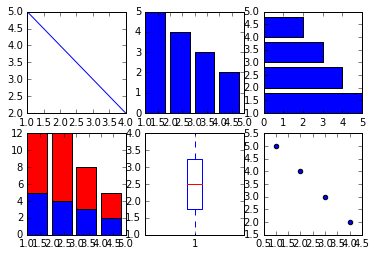

In [3]:
x = [1,2,3,4]
y = [5,4,3,2]

plt.figure() # 创建一个新的图表
# 如果给方法提供一个字符串参数，例如sample charts，这个字符串就会成为窗口的后台标题
# 如果通过相同的字符串参数调用figure()方法，将会激活相应的图表，并且接下来的绘图操作都在此图表中进行

plt.subplot(231) # 把图表分割成2*3的网格，也可以用plt.subplot(2, 3, 1)这种形式调用，第一个参数是行数，第二个参数是列数，第三个参数表示标号
plt.plot(x, y)

plt.subplot(232)
plt.bar(x, y) # 柱状图

plt.subplot(233)
plt.barh(x, y) # 水平柱状图

plt.subplot(234)
plt.bar(x, y)
y1 = [7,8,5,3]
plt.bar(x, y1, bottom=y, color = 'r') # 绘制堆叠柱状图，将两个柱状图方法调用连在一起，通过设置参数bottom=y，把两个柱状图连接起来形成堆叠柱状图

plt.subplot(235)
plt.boxplot(x) # 箱线图

plt.subplot(236)
plt.scatter(x,y) # 散点图

([<matplotlib.axis.YTick at 0x9e0c208>,
 <a list of 3 Text yticklabel objects>)

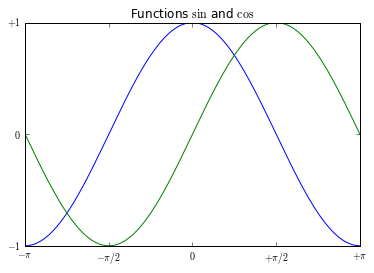

In [4]:
x = np.linspace(-np.pi, np.pi, 256, endpoint=True) # 生成-Pi到Pi之间具有相同线性距离的256个点

y = np.cos(x) # 计算余弦值
y1 = np.sin(x) # 计算正弦值

plt.plot(x, y) # 绘制余弦图
plt.plot(x, y1) # 绘制正弦图

plt.title("Functions $\sin$ and $\cos$") # LaTex语法，用$\sin$、$\cos$表达式在图表上写上希腊字母

plt.xlim(-3.0, 3.0) # 设置x轴刻度的最大、最小值（当xticks的刻度-np.pi比xlim最小值-3.0更小时，以xticks为准）
plt.ylim(-1.0, 1.0) # 设置y轴刻度的最大、最小值

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) # LaTex语法，用$-\pi$等表达式在图表上写上希腊字母
plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$']) # 设置x轴、y轴刻度及标签

### 安装图像处理工具：Python图像库（PIL）  
[Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/)  
[pillow](http://www.lfd.uci.edu/~gohlke/pythonlibs/#pillow)  
Pillow is a replacement for PIL, the Python Image Library, which provides image processing functionality and supports many file formats.  
Use `from PIL import Image` instead of `import Image`.

### 配置matplotlib参数

配置文件包括以下配置项
+ axes  
设置坐标轴边界和表面的颜色、坐标刻度值大小和网格的显示
+ backend  
设置目标输出TkAgg和GTKAgg
+ figure  
控制dpi、边界颜色、图形大小和子区（subplot）设置
+ font  
字体集（font family）、字体大小和样式设置
+ grid  
设置网格颜色和线型
+ legend  
设置图例和其中文本的显示
+ line  
设置线条（颜色、线型、宽度等）和标记
+ patch  
填充2D空间的图形对象，如多边形和圆。控制线宽、颜色和抗锯齿设置等
+ savefig  
可以对保存的图形进行单独设置。例如设置渲染的文件的背景为白色
+ text  
设置字体颜色、文本解析（纯文本或latex标记）等
+ verbose  
设置matplotlib在执行期间信息输出，如silent、helpful、debug和debug-annoying
+ xticks和yticks  
为x、y轴的主刻度和次刻度设置颜色、大小、方向，以及标签大小

#### 永久配置
matplotlib配置信息是从配置文件读取的。在配置文件中可以为matplotlib的几乎所有属性指定永久有效的默认值

##### 当前工作目录
+ 代码运行的目录  
    + 在当前目录下，可以为目录所包含的当前项目代码定制matplotlib配置项。配置文件的文件名是matplotlibrc

#####  用户级.matplotlib/matplotlibrc文件（Per user .matplotlib/matplotlibrc）
+ 用户的Documents and Settings目录  
    + 可以用matplotlib.get_configdir()命令来找到当前用户的配置文件目录

##### 安装级配置文件（Per installation configuration file)  
+ Python的site-packages目录下（site-packages/matplotlib/mpl-data/matplotlibrc）  
    + 系统级配置，每次重新安装matplotlib后，配置文件会被覆盖
    + 如果希望保持持久有效的配置，最好选择在用户级配置文件中进行设置
    + 对本配置文件的最佳应用方式，是将其作为默认配置模板

#### 动态配置

##### 通过rcParams字典访问并修改所有已经加载的配置项

##### 通过matplotlib.rc()传入属性的关键字元组来修改配置项

##### 重置配置

### figure实例及fig.add_axes()方法

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

In [5]:
x = np.linspace(0, 5, 10)
y = x ** 2

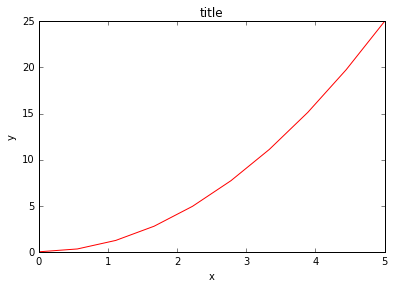

In [6]:
# 创建figure实例
fig = plt.figure()

# 使用add_axes方法，创建一个新的axis实例
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# 通过axis实例方法绘图
axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

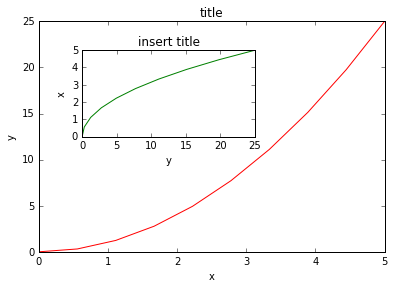

In [7]:
fig = plt.figure()

# 通过在figure实例中添加axis实例，可以任意控制一个figure钟axis的数量及位置
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

### plt.subplots()方法

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

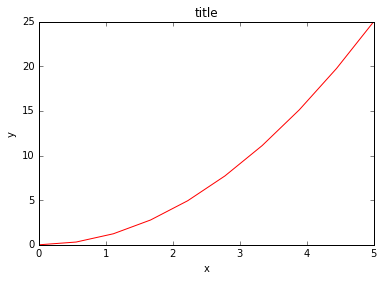

In [8]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

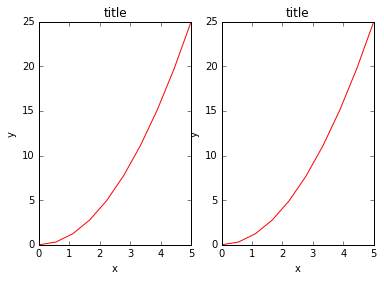

In [9]:
# 通过设置nrows、ncols参数添加子图
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

#### fig.tight_layout()方法

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

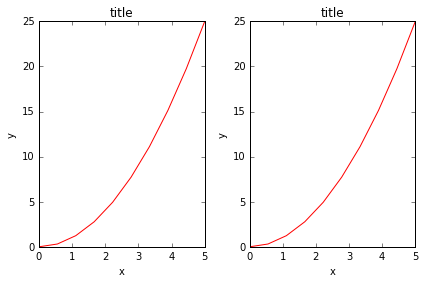

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### 设置figure的大小、长宽比和DPI
figsize参数、dpi参数

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [11]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

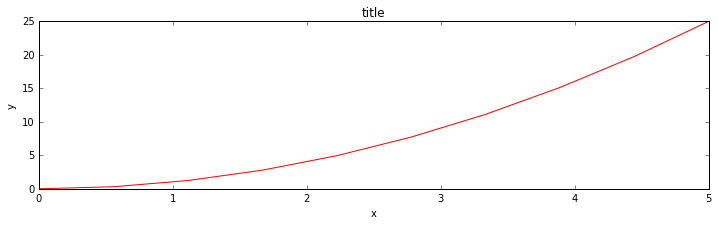

In [12]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### 保存图表
To save a figure to a file we can use the `savefig` method in the `Figure` class:

Figure.savefig的选项
+ fname  
含有文件路径的字符串或Python的文件型对象。图像格式由文件扩展名推断得出，例如，.pdf推断出PDF，.png推断出PNG
+ dpi  
图像分辨率（每英寸点数），默认为100
+ facecolor、edgecolor  
图像的背景色，默认为“w”（白色）
+ format  
显式设置文件格式（“png”、“pdf”、“svg”、“ps”、“eps”……）
+ bbox_inches  
图表需要保存的部分。如果设置为“tight”，则将尝试剪除图表周围的空白部分

Here we can also optionally specify the DPI and choose between different output formats:

#### 格式

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.  

For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

### 标题、标签、图例

#### 标题
每一个axis实例都可以添加一个标题

In [13]:
ax.set_title("title");

#### 坐标轴标签
每个axis实例的x、y轴都可以添加坐标轴标签

In [14]:
ax.set_xlabel("x")
ax.set_ylabel("y");

#### 图例

##### 方法一
Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves.

In [15]:
ax.legend(["curve1", "curve2", "curve3"]); # 在legend方法中添加列表、元组形式的参数

##### 方法二
A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure.

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

In [16]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend(); # 在plot方法中添加label参数，在legend方法中不添加任何参数

##### 图例的位置
loc参数

| 字符串       | 数值      | 字符串   |  数值 |
| :-------------: |:-----------:| :-----:|  :-----:|
| upper right    | 1        | center left   |   6 |
| upper left    |  2        | center right  |   7  |
| lower left    |  3        | lower center  |   8  |
| lower right   |  4        | upper center  |   10 |
| right       |  5        | center      |   11 |

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [17]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

###### loc='best'

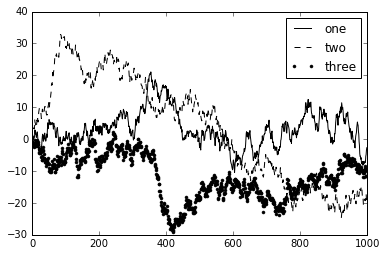

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one') # 在添加subplot时传入label参数
ax.plot(randn(1000).cumsum(), 'k--', label='two') # 要从图例中去除一个或多个元素，不传入label或传入label='_nolegend_'即可
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best') # loc参数控制图例在图中的位置

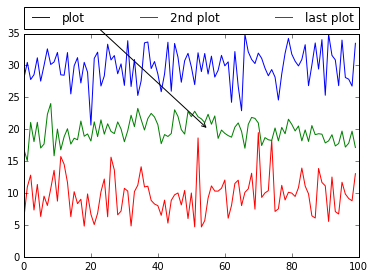

In [19]:
# 生成3个正态分布数据数据集
x1 = np.random.normal(30, 3, 100)
x2 = np.random.normal(20, 2, 100)
x3 = np.random.normal(10, 3, 100)

# 绘制3个数据集，并为每个plot指定一个字符串标签
plt.plot(x1, label='plot') # 如果不想在图例中显示标签，可以将标签设置为_nolegend_
plt.plot(x2, label='2nd plot')
plt.plot(x3, label='last plot')

# 绘制图例
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.102), # 指定边界框起始位置为(0, 1.02)，并设置宽度为1，高度为0.102
           loc=3, # 设置位置为lower left
           ncol=3, # 设置列数为3，默认值为1
           mode="expand", # mode为None或者expand，当为expand时，图例框会扩展至整个坐标轴区域
           borderaxespad=0.) # 指定坐标轴和图例边界之间的间距

# 绘制注解
plt.annotate("Important value", # 注解文本的内容
             xy=(55,20), # 箭头终点所在位置
             xycoords='data', # 指定注解和数据使用相同的坐标系
             xytext=(5, 38), # 注解文本的起始位置，箭头由xytext指向xy坐标位置
             arrowprops=dict(arrowstyle='->')) # arrowprops字典定义箭头属性，此处用arrowstyle定义箭头风格

#### 示例
The following figure shows how to use the figure title, axis labels and legends described above:

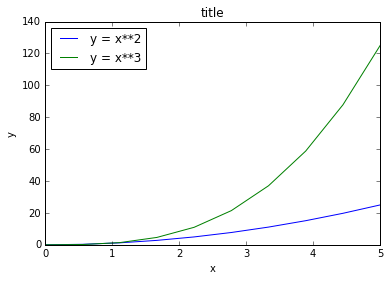

In [20]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### 文字的格式：LaTeX、字体大小、字体族

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

#### 动态设置

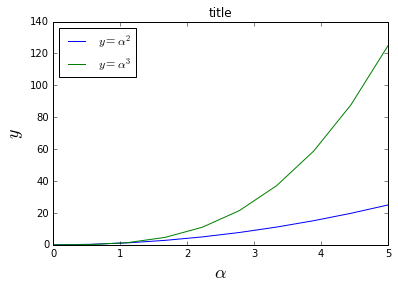

In [21]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$") # LaTeX字符串可以用于图例、标签、标题等场合，需要用 $ 美元符号包裹，并在前面加上r，以禁用转移字符 \
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18) # fontsize参数设置字体大小
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

#### 全局设置

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [22]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'}) # 更改matplotlib全局设置

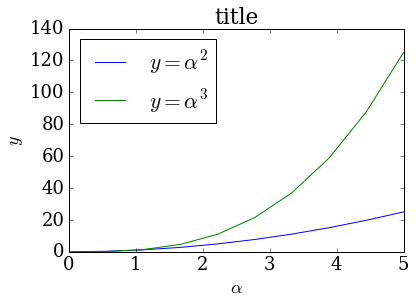

In [23]:
# 默认使用matplotlib全局设置绘图
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

#### STIX字体

A good choice of global fonts are the STIX fonts: 

In [24]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

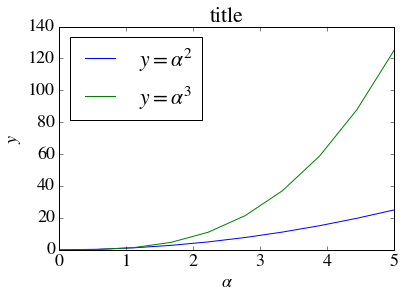

In [25]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [26]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

### 设置颜色、线宽、线型

#### MATLAB风格的参数

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

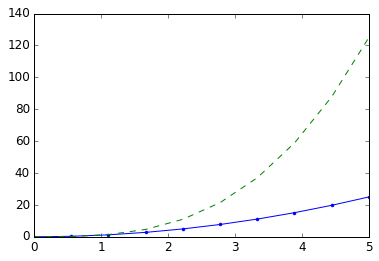

In [27]:
fig, ax = plt.subplots()

# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

#### 线条颜色
color或c

##### 别名
| 别名       | 颜色      | 别名   |  颜色 |
| :-------------: |:------------:| :-----:|  :-----:|
| b         | 蓝色      | g     |  绿色 |
| r         | 红色      | y     |  黄色 |
| c         | 青色      | k     |  黑色 |
| m         | 洋红色    | w     |  白色 |

##### 另外三种定义颜色值的方式
+ HTML十六进制字符串
    + color = '#eeefff'       



+ 合法的HTML颜色名字
    + color = 'red'/'chartreuse'      



+ 归一化到[0, 1]的RGB元组
    + color = (0.3, 0.3, 0.4)

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

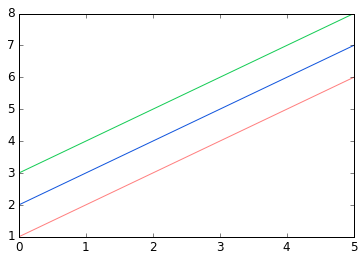

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

#### 背景色
设置背景色，通过向plt.axes()或者plt.subplot()方法传入axisbg参数，来设置坐标轴的背景色

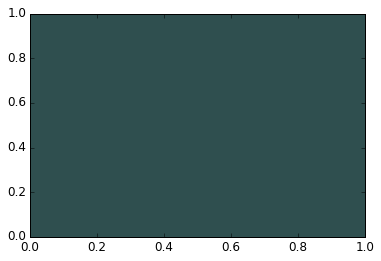

In [29]:
plt.subplot(111, axisbg=(0.1843, 0.3098, 0.3098))

#### 线宽、线型
| 线条风格     | 描述      | 线条风格 |  描述 |
| :-------------: |:------------:| :----:|  :-----:|
| '-'        | 实线     | ':'     |  虚线 |
| '--'       | 破折线    | 'steps'  |  阶梯线 |
| '-.'       | 点划线    | 'None'，' '，'' |  什么都不画 |

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

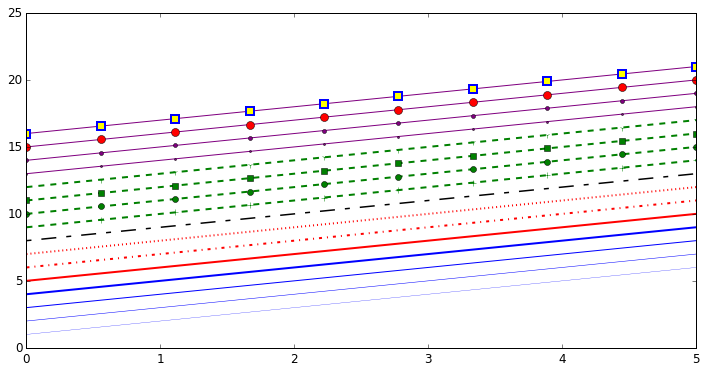

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

##### dashes
设置破折号序列各段的宽度，如果seq为空或者seq=[None, None]，linestyle将被设置为solid

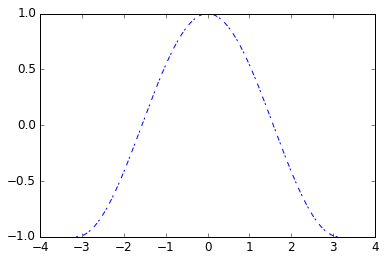

In [31]:
# 第一段线2个点的宽度，接下来的空白区5个点的宽度，第二段线5个点的宽度，空白区2个点的宽度，以此类推
plt.plot(np.linspace(-np.pi, np.pi, 256, endpoint=True), np.cos(np.linspace(-np.pi, np.pi, 256, endpoint=True)), dashes=[2, 5, 5, 2])

#### 线条标记
marker参数
+ '|'  
竖线

| 标记        | 描述       | 标记   |  描述 |
| :-------------: |:-----------:| :----:|  :-----:|
| 'O'         | 圆圈      | '.'     |  点 |
| 'D'         | 菱形      | 's'    | 正方形   |
| 'h'         | 六边形1    | '\*'    |  星号  |
| 'H'         | 六边形2    | 'd'    |  小菱形  |
| '\_'        |  水平线     | 'v'    | 一角朝下的三角形  |
|'','None',' ',None| 无       | '<'    | 一角朝左的三角形  |
| '8'         | 八边形     | '>'    | 一角朝右的三角形  |
| 'p'         | 五边形     | '^'    | 一角朝上的三角形  |
| ','         | 像素       | 'x'   | X   |
| '+'         | 加号       | 

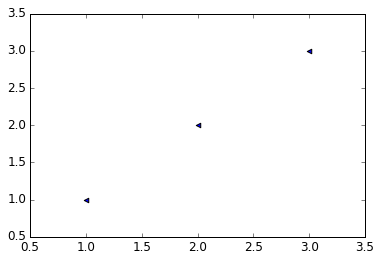

In [32]:
plt.scatter([1, 2, 3], [1, 2, 3], marker='<')

#### 三种设置方式

##### 向方法传入关键字参数来指定线型

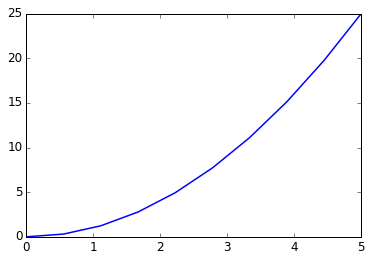

In [33]:
plt.plot(x, y, linewidth=1.5)

##### 对plot()方法返回的实例使用一系列的setter方法

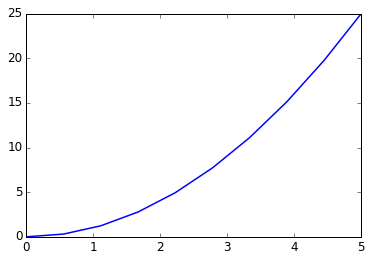

In [34]:
line, = plt.plot(x, y)
#  plt.plot(x, y)返回的是list
# line = plt.plot(x, y)，则line是list
# line, = plt.plot(x, y)，则line是matplotlib.lines.Line2D实例，所以line后面有个逗号
line.set_linewidth(1.5)

##### 使用setp()方法

[None]

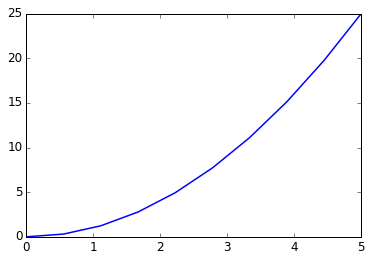

In [35]:
line = plt.plot(x, y)
plt.setp(line, 'linewidth', 1.5)

### 坐标轴长度范围、尺度
Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### 坐标轴长度范围

##### set_ylim、set_xlim、axis('tight')

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

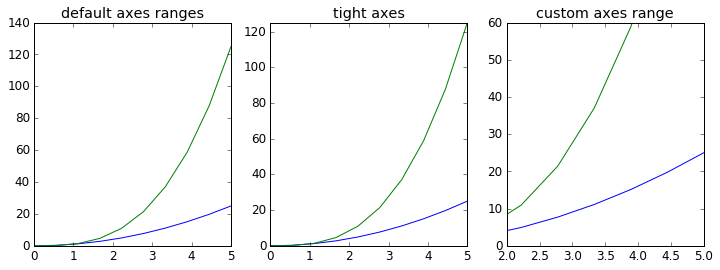

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

##### plt.axis()

(0.0, 1.0, 0.0, 1.0)

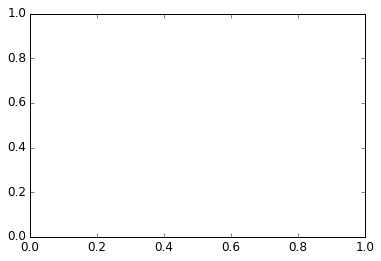

In [37]:
plt.axis() # 调用不带参数的axis()方法，将返回坐标轴的默认值，并显示一个只有坐标轴的空白图

[-1, 1, -10, 10]

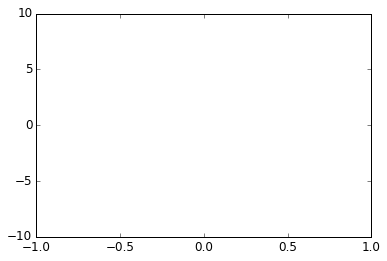

In [38]:
s = [-1, 1, -10, 10] # 四个值分别是xmin、xmax、ymin、ymax
plt.axis(s)

(-10, 1.0, 0.0, 1.0)

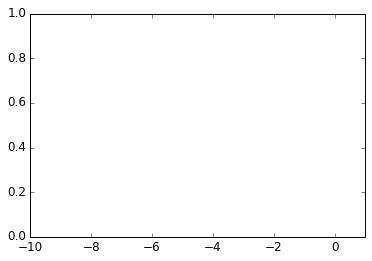

In [39]:
plt.axis(xmin=-10) # 可以通过关键字参数单独更新某一个参数值

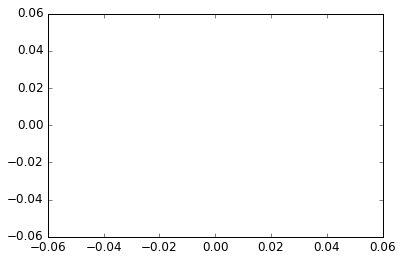

In [40]:
plt.autoscale() # 自动计算坐标轴的最佳大小以适应数据的显示

#### 对数尺度
set_xscale、set_yscale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

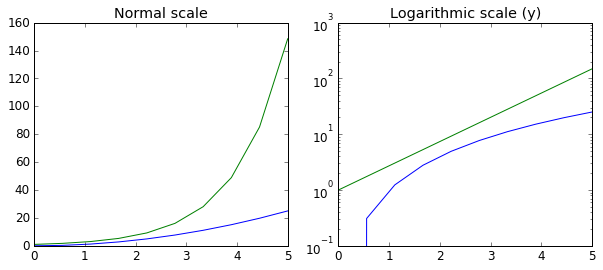

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### 设置坐标轴刻度、标签
set_xticks、set_yticks、set_xticklabels、set_yticklabels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

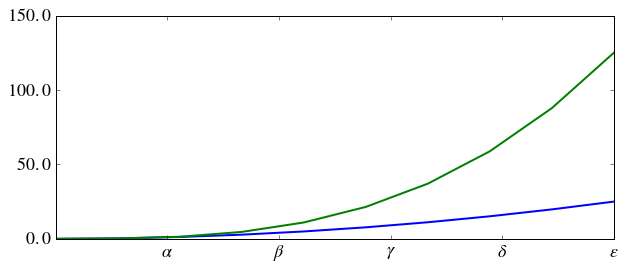

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

#### 科学计数法
Scientific notation

With large numbers on axes, it is often better use scientific notation:

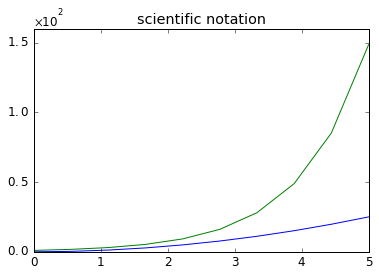

In [43]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### 设置坐标轴刻度标签到坐标轴的距离
Axis number and axis label spacing

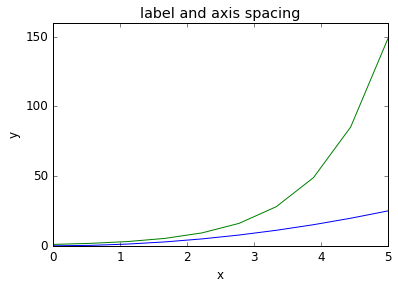

In [44]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [45]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### 调整图表大小
Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

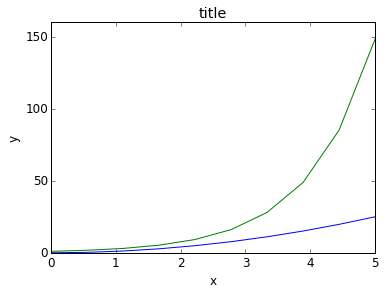

In [46]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9); # 调整图表的大小，四个参数分别代表图表四个边框所在位置（归一化0到1）

### 网格线

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

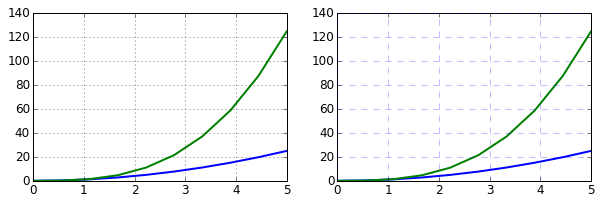

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True) # 显式网格线

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5) # 用与plot同样的参数设置网格线

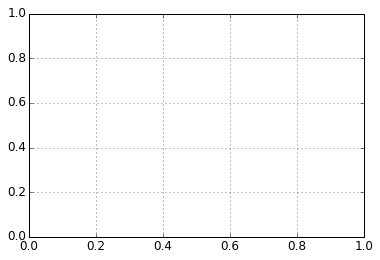

In [48]:
plt.grid(b=True, which='major', axis='both')
# which指定绘制的网格刻度类型（major、minor或者both）
# axis指定绘制哪组网格线（both、x或者y）

### 水平线、垂直线

#### plt.axhline()、plt.axvline()

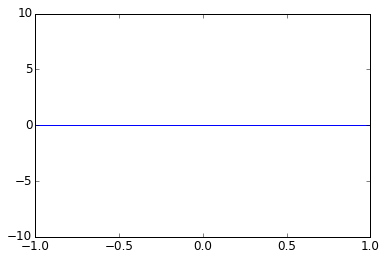

In [49]:
plt.axis([-1, 1, -10, 10])
plt.axhline() # 添加水平线，重要参数包括：y轴位置、xmin、xmax，默认在y=0位置绘制水平线

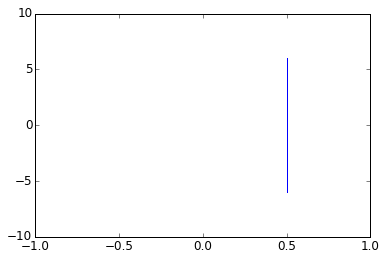

In [50]:
plt.axis([-1, 1, -10, 10])
plt.axvline(0.5, 0.2, 0.8) # 添加垂直线，重要参数包括：x轴位置、ymin、ymax，默认在x=0位置绘制水平线(ymin、ymax都是比例值)

#### plt.axhspan()、plt.axvspan()

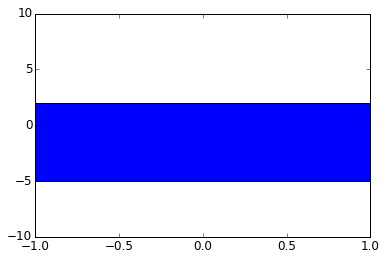

In [51]:
plt.axis([-1, 1, -10, 10])
plt.axhspan(-5, 2) # 绘制一条水平带（矩形），需要ymin、ymax参数指定水平带的宽度（ymin、ymax都是实际值）

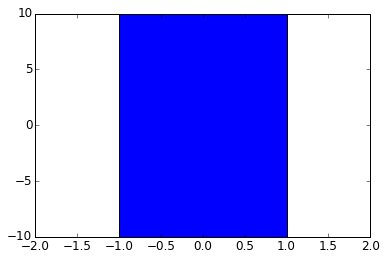

In [52]:
plt.axis([-2, 2, -10, 10])
plt.axvspan(-1, 1) # 绘制一条垂直带（矩形），需要xmin、xmax参数指定水平带的宽度（xmin、xmax都是实际值）

### 设置边框

We can also change the properties of axis spines:

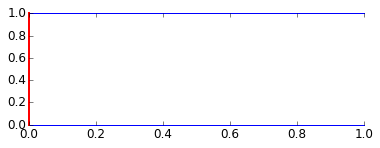

In [53]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

### 双重坐标轴

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

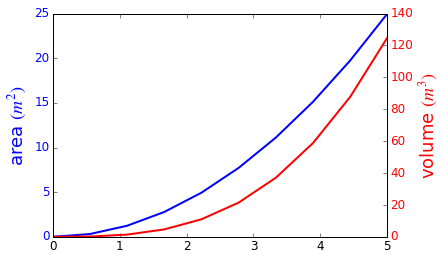

In [54]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### 中央坐标轴
Axes where x and y is zero

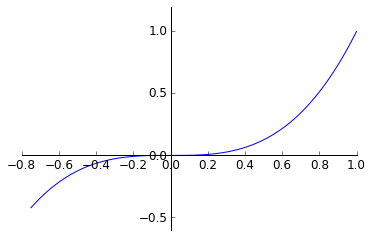

In [55]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

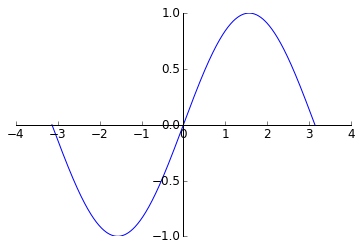

In [56]:
# 通过set_color去掉不想显示的轴线、通过set_position把轴线移动到特定位置
x = np.linspace(-np.pi, np.pi, 500) 
y = np.sin(x)

plt.plot(x, y)

# gca get current axes，用ax指代当前的图表
ax = plt.gca()

# 隐藏上侧和右侧坐标轴线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 将下侧和左侧坐标轴线移到图中央
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

# 设置坐标轴刻度标签位置
ax.xaxis.set_ticks_position('bottom') # xaxis类控制x轴
ax.yaxis.set_ticks_position('left') # yaxis类控制y轴

### 其他2D绘图样式
Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

#### 示例

In [57]:
n = np.array([0,1,2,3,4,5])

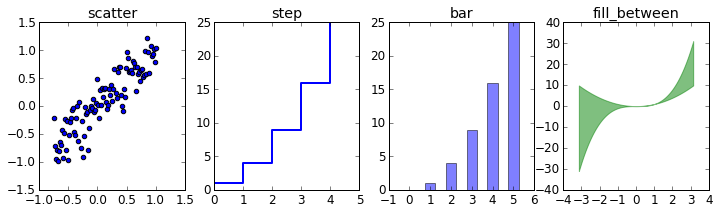

In [58]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx))) # 散点图
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2) # 阶梯图
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5) # 条形图
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5); # 条带图
axes[3].set_title("fill_between");

#### 带填充区域的图表
对曲线下面或两个曲线之间的区域进行填充

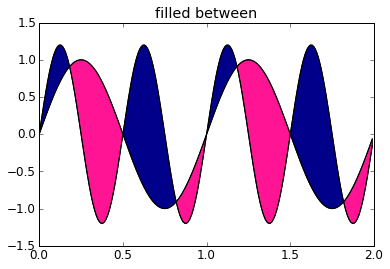

In [59]:
x = np.arange(0.0, 2, 0.01)

y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig = plt.figure()
ax = plt.gca()

# 绘制曲线
ax.plot(x, y1, x, y2, color='black')

# 填充曲线之间的区域
ax.fill_between(x, y1, y2,
                where=y2>=y1, # where指定一个条件来填充曲线，where接受布尔值（可以是表达式）
                facecolor='darkblue',
                interpolate=True)

ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='deeppink', interpolate=True)

ax.set_title('filled between')

#### 带彩色标记的散点图

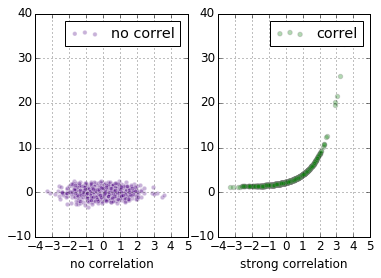

In [60]:
x = np.random.randn(1000)

y1 = np.random.randn(len(x)) # y1与x不相关
y2 = 1.2 + np.exp(x) # y2与x高度相关

ax1 = plt.subplot(121)
plt.scatter(x, y1, color='indigo', alpha=0.3, edgecolors='white', label='no correl')
plt.xlabel('no correlation')
plt.grid(True)
plt.legend()

ax2 = plt.subplot(122, sharey=ax1, sharex=ax1)
plt.scatter(x, y2, color='green', alpha=0.3, edgecolors='grey', label='correl')
plt.xlabel('strong correlation')
plt.grid(True)
plt.legend()

plt.show()

#### 极坐标

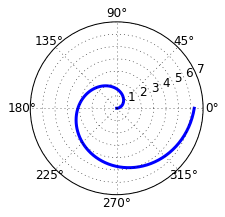

In [61]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

#### 直方图
plt.hist()的参数
+ bins  
可以是一个bin数量的整数值，也可以是表示bin的一个序列。默认值为10
+ range  
bin的范围，当bins参数为序列时，此参数无效。范围外的值将被忽略掉，默认值为None
+ normed  
如果值为True，直方图的值将进行归一化处理，形成概率密度，默认值为False
+ histtype  
    + bar  
    默认为bar类型的直方图
    + barstacked  
    用于多种数据的堆叠直方图
    + step  
    创建未填充的线形图
    + stepfilled  
    创建默认填充的线形图
+ align  
用于bin边界之间矩形条的居中设置。默认值为mid，其他值为left和right
+ color  
指定直方图的颜色。可以是单一颜色值或颜色的序列。如果指定了多个数据集合，颜色序列将会设置为相同的顺序。如果未指定，将会使用一个默认的线条颜色
+ orientation  
通过设置orientation为horizontal创建水平直方图。默认值为vertical

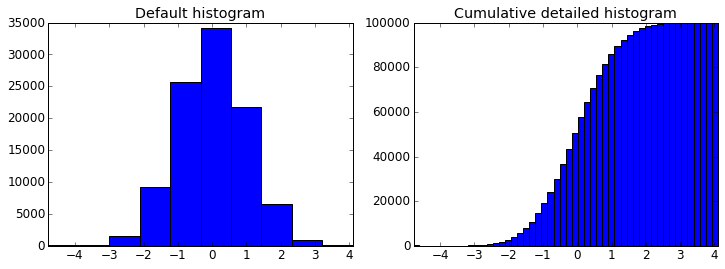

In [62]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n) # 普通直方图，概率密度函数f(x)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram") # 累积直方图，分布函数F(x)
axes[1].set_xlim((min(n), max(n)));

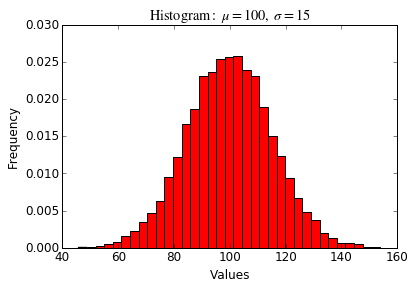

In [63]:
mu = 100
sigma = 15
x = np.random.normal(mu, sigma, 10000) # 生成正态分布数据集

ax = plt.gca() # 获取当前图表

ax.hist(x, bins=35, normed=True, color='r') # 35个bins，颜色为红色，概率密度直方图

ax.set_xlabel('Values')
ax.set_ylabel('Frequency') # 设置x、y轴标题

ax.set_title(r'$\mathrm{Histogram:}\ \mu=%d,\ \sigma=%d$' % (mu, sigma)) # 设置图表标题

#### 误差条形图
误差条形图的参数  
color、edgecolor、linewidth、xerr和yerr可以是单一值，也可以是和误差条数目相同长度的序列
+ width  
给定误差条的宽度，默认值是0.8
+ bottom  
如果指定了bottom，其值会加到高度中，默认值为None
+ edgecolor  
指定误差条边界颜色
+ ecolor  
指定误差条的颜色
+ linewidth  
误差条边界宽度，可以设为None（默认）和0（此时误差条边界将不显示出来）
+ orientation  
有vertical和horizontal两个值
+ xerr和yerr  
用于在条形图上生成误差条。非对称误差条必须用一个二维数组来指定xerr和yerr，其中第一个列表包括负向误差的值，第二个包含正向误差的值
+ hatch
指定阴影线
    + /  
    斜线
    + \  
    反斜线
    + |  
    垂直线
    + \-  
    水平线
    + \+  
    十字线
    + x  
    交叉线
    + o  
    小圆圈
    + 0  
    大圆圈
    + .  
    点
    + \*  
    星号

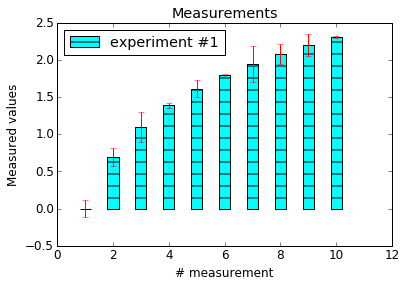

In [64]:
# 生成measurements的标号1~10
x = np.arange(1, 11, 1)

# 为每个measurements生成相应的values
y = np.log(x)

# 生成服从标准正态分布的误差
xe = 0.1 * np.abs(np.random.randn(len(y)))

# 绘制误差条形图
plt.bar(x,
        y,
        yerr=xe, # 在条形图中生成误差条（一个标准差、一个标准误、95%置信区间等）
        width=0.4, # 误差条宽度
        align='center', # 指定条形的位置
        ecolor='r', # 指定误差条的颜色
        color='cyan', # 指定条形的填充颜色
        label='experiment #1', # 字符串标签，用于生成legend
        hatch='-') # 指定阴影线

# give some explainations
plt.xlabel('# measurement')
plt.ylabel('Measured values')
plt.title('Measurements')
plt.legend(loc='upper left')

plt.show()

#### 饼图

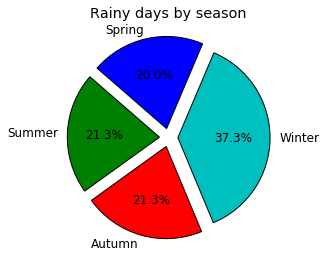

In [65]:
# 绘制一个正方形的figure and axes
plt.figure(1, figsize=(4, 4))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

# 圆弧按照逆时针绘制
labels = 'Spring', 'Summer', 'Autumn', 'Winter'
values = [15, 16, 16, 28]
explode =[0.1, 0.1, 0.1, 0.1] # 指定分裂序列，每一个元素表示每个圆弧间的偏移量，为半径的百分比

# 绘制饼图
plt.pie(values,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%', # 格式化绘制圆弧中的标签，标签可以是一个格式化字符串或者一个可调用的对象（函数）
        startangle=67) # 指定圆弧开始绘制的角度，默认从角度0（x轴）开始绘制

plt.title('Rainy days by season')

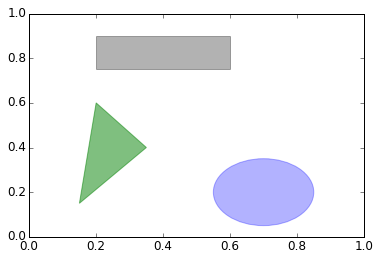

In [66]:
# 部分图形对象可以在matplotlib.pyplot中找到，但完整的图形对象集合位于matplotlib.patches中

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) # 先创建图形对象
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect) # 再通过ax.add_patch将图形对象添加到subplot中
ax.add_patch(circ)
ax.add_patch(pgon)

### 文字注解
Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

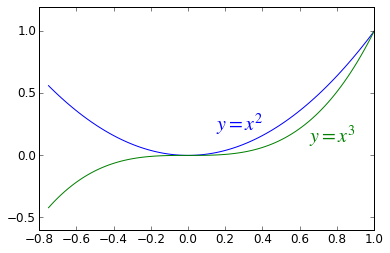

In [67]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

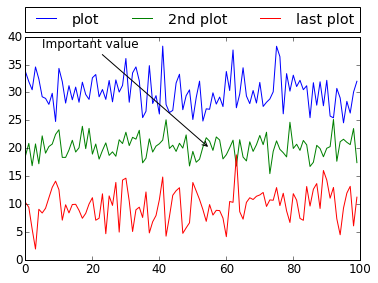

In [68]:
# 生成3个正态分布数据数据集
x1 = np.random.normal(30, 3, 100)
x2 = np.random.normal(20, 2, 100)
x3 = np.random.normal(10, 3, 100)

# 绘制3个数据集，并为每个plot指定一个字符串标签
plt.plot(x1, label='plot') # 如果不想在图例中显示标签，可以将标签设置为_nolegend_
plt.plot(x2, label='2nd plot')
plt.plot(x3, label='last plot')

# 绘制图例
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.102), # 指定边界框起始位置为(0, 1.02)，并设置宽度为1，高度为0.102
           loc=3, # 设置位置为lower left
           ncol=3, # 设置列数为3，默认值为1
           mode="expand", # mode为None或者expand，当为expand时，图例框会扩展至整个坐标轴区域
           borderaxespad=0.) # 指定坐标轴和图例边界之间的间距

# 绘制注解
plt.annotate("Important value", # 注解文本的内容
             xy=(55,20), # 箭头终点所在位置
             xycoords='data', # 指定注解和数据使用相同的坐标系
             xytext=(5, 38), # 注解文本的起始位置，箭头由xytext指向xy坐标位置
             arrowprops=dict(arrowstyle='->')) # arrowprops字典定义箭头属性，此处用arrowstyle定义箭头风格

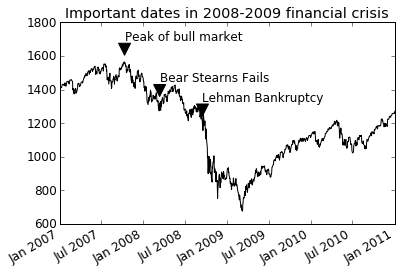

In [69]:
# 注解可以通过text、arrow和annotate等函数进行添加

from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('./spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

### 子图
Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots
plt.subplots()选项
+ nrows  
subplot的行数
+ ncols  
subplot的列数
+ sharex  
所有subplot应该使用相同的X轴刻度（调节xlim将会影响所有subplot）
+ sharey  
所有subplot应该使用相同的Y轴刻度（调节ylim将会影响所有subplot）
+ subplot_kw  
用于创建各subplot的关键字字典
+ ** fig_kw  
创建figure时的其他关键字，如plt.subplots(2,2,figsize=(8,6))

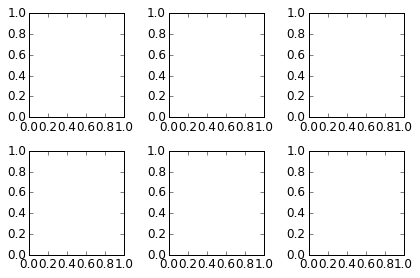

In [70]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

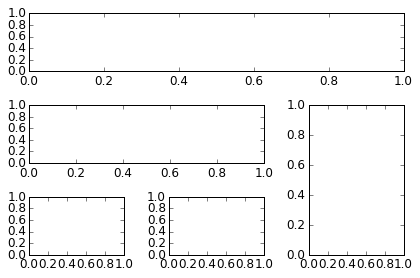

In [71]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

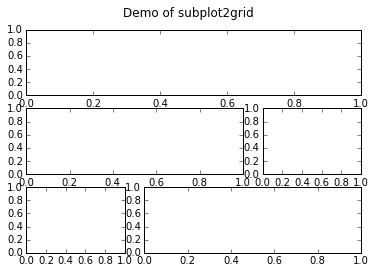

In [72]:
plt.figure(0)
axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
axes3 = plt.subplot2grid((3, 3), (1, 2))
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1), colspan=2)

# tidy up tick labels size
all_axes = plt.gcf().axes
for ax in all_axes:
    for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
        ticklabel.set_fontsize(10)

plt.suptitle("Demo of subplot2grid")

#### gridspec

In [73]:
import matplotlib.gridspec as gridspec

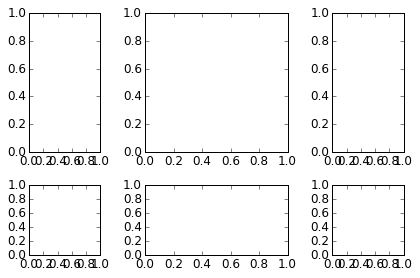

In [74]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

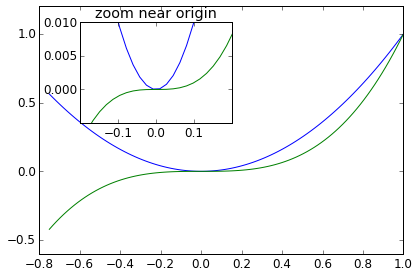

In [75]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

#### 调整子图之间的间距
plt.subplots_adjust()、wspace和hspace参数

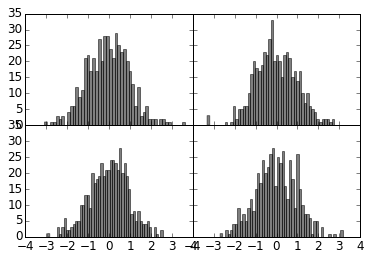

In [76]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5) # 通过索引选取相应位置的AxesSubplot实例，并用实例的方法绘图
plt.subplots_adjust(wspace=0, hspace=0) # 将subplot之间的间距收缩到了0

### colormap和等高线图
Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [77]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [78]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

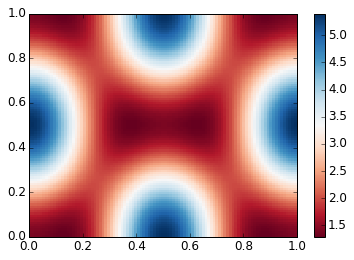

In [79]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

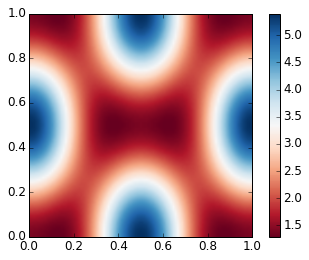

In [80]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

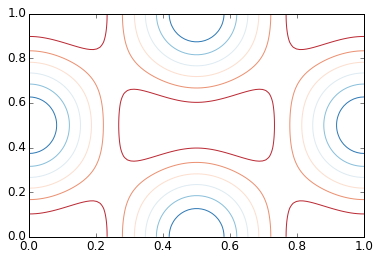

In [81]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

### 向图表中添加数据表

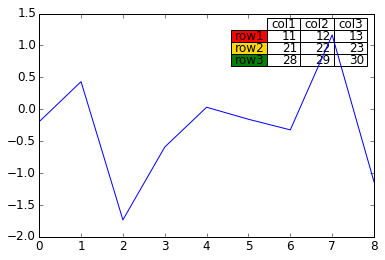

In [82]:
plt.figure()
axes=plt.gca()
y= np.random.randn(9)

col_labels=['col1','col2','col3']
row_labels=['row1','row2','row3']
table_vals=[[11,12,13],[21,22,23],[28,29,30]]
row_colors=['red','gold','green']

# plt.table返回一个Table对象实例，可以访问该实例的借口，对表格进行调整，最后用plt.add_table()方法把表格添加到相应的坐标系实例中
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1]*3,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  rowColours=row_colors,
                  loc='upper right')

plt.plot(y)

## 3D图

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [83]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### 曲面图

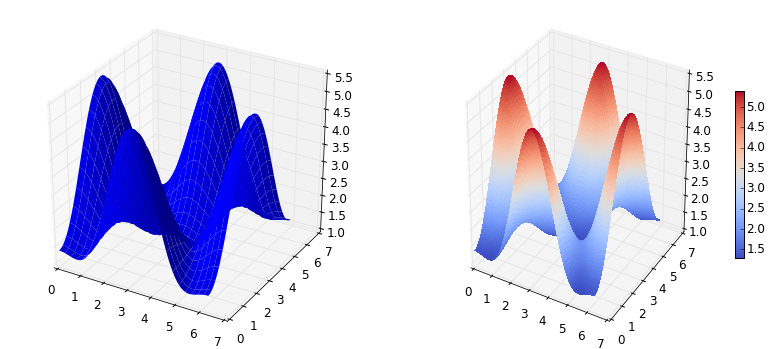

In [84]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

### 线框图

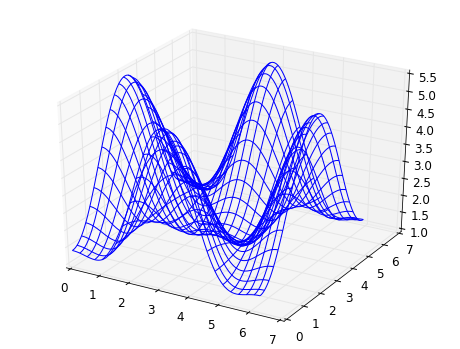

In [85]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

### 映射等高线图

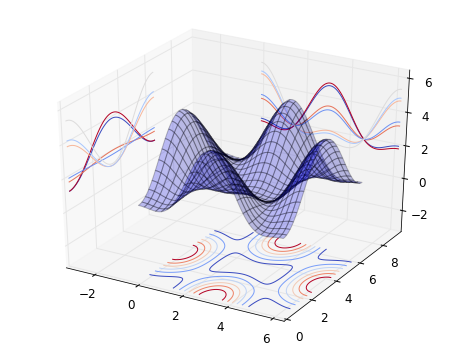

In [86]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

### 改变视角

We can change the perspective of a 3D plot using the `view_init` method, which takes two arguments: `elevation` and `azimuth` angle (in degrees):

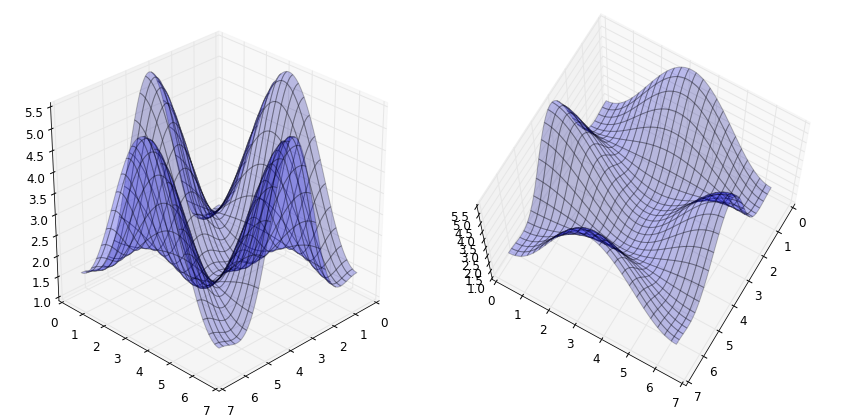

In [87]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## 后端设置

Matplotlib has a number of "backends" which are responsible for rendering graphs. The different backends are able to generate graphics with different formats and display/event loops. There is a distinction between noninteractive backends (such as 'agg', 'svg', 'pdf', etc.) that are only used to generate image files (e.g. with the `savefig` function), and interactive backends (such as Qt4Agg, GTK, MaxOSX) that can display a GUI window for interactively exploring figures. 

A list of available backends are:

In [88]:
print(matplotlib.rcsetup.all_backends)

[u'GTK', u'GTKAgg', u'GTKCairo', u'MacOSX', u'Qt4Agg', u'Qt5Agg', u'TkAgg', u'WX', u'WXAgg', u'CocoaAgg', u'GTK3Cairo', u'GTK3Agg', u'WebAgg', u'nbAgg', u'agg', u'cairo', u'emf', u'gdk', u'pdf', u'pgf', u'ps', u'svg', u'template']


The default backend, called `agg`, is based on a library for raster graphics which is great for generating raster formats like PNG.

Normally we don't need to bother with changing the default backend; but sometimes it can be useful to switch to, for example, PDF or GTKCairo (if you are using Linux) to produce high-quality vector graphics instead of raster based graphics. 

### Generating SVG with the svg backend
svg：可缩放矢量图形

### The IPython notebook inline backend

When we use IPython notebook it is convenient to use a matplotlib backend that outputs the graphics embedded in the notebook file. To activate this backend, somewhere in the beginning on the notebook, we add:

    %matplotlib inline

It is also possible to activate inline matplotlib plotting with:

    %pylab inline

The difference is that `%pylab inline` imports a number of packages into the global address space (scipy, numpy), while `%matplotlib inline` only sets up inline plotting. In new notebooks created for IPython 1.0+, I would recommend using `%matplotlib inline`, since it is tidier and you have more control over which packages are imported and how. Commonly, scipy and numpy are imported separately with:

    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt

The inline backend has a number of configuration options that can be set by using the IPython magic command `%config` to update settings in `InlineBackend`. For example, we can switch to SVG figures or higher resolution figures with either:

    %config InlineBackend.figure_format='svg'
     
or:

    %config InlineBackend.figure_format='retina'
    
For more information, type:

    %config InlineBackend

### Interactive backend (this makes more sense in a python script file)

Note that when we use an interactive backend, we must call `plt.show()` to make the figure appear on the screen.

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
